In [37]:
%matplotlib inline

import IPython.display
from ipywidgets import interact, interactive, fixed

import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import scipy.ndimage
import src.data.audio as audio

In [151]:
# Parameters
SIGNAL_TRUNCATE_IN_S = 3
lowcut = 300
highcut = 3000

FSIZE = 25
FSTRIDE = 4
LOG = True
THRESH = 3
N_ITER = 100

In [152]:
# Load/truncate the .wav file
wav = 'data/OSR_us_000_0010_8k.wav'
signal, samplerate = audio.get_file_data(wav)

signal = audio.butter_bandpass_filter(signal, samplerate, lowcut, highcut, 5)

if np.shape(signal)[0]/float(samplerate) > SIGNAL_TRUNCATE_IN_S:
    signal = signal[0:samplerate*SIGNAL_TRUNCATE_IN_S]

    print ('Length in time (s): ', np.shape(signal)[0]/float(samplerate))

Length in time (s):  3.0


In [153]:
IPython.display.Audio(data=signal, rate=samplerate)

(744, 100)


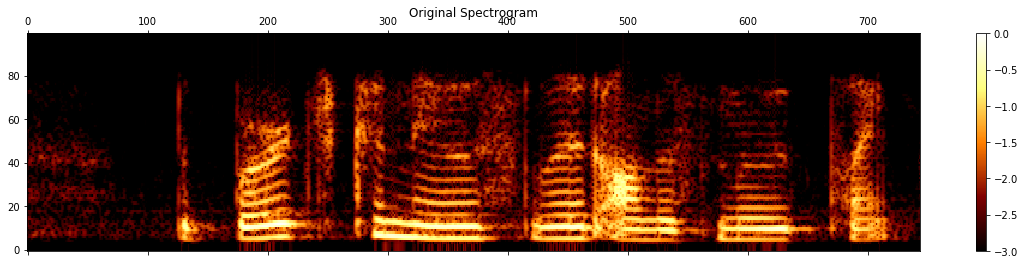

In [154]:
# View the spectrogram 
spectro = audio.stft_spectrogram(signal.astype('float64'), samplerate, frame_size_in_ms=FSIZE, frame_stride_in_ms=FSTRIDE,
                            log=LOG, thresh=THRESH)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
cax = ax.matshow(np.transpose(spectro), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('Original Spectrogram')

In [155]:
# reconstruct the signal
inverted = audio.invert_stft_spectrogram(spectro, samplerate, log=LOG, frame_size_in_ms=FSIZE, frame_stride_in_ms=FSTRIDE, n_iterations=N_ITER)

In [156]:
IPython.display.Audio(data=inverted, rate=samplerate)

(744, 100)


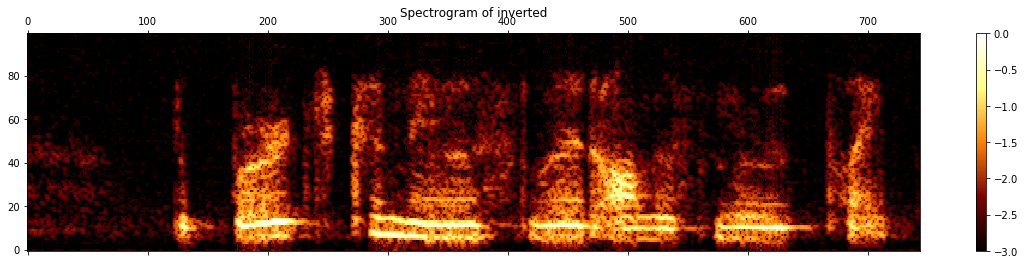

In [157]:
# Take a look at the spectrogram of the reconstructed signal...
inverted_spectro = audio.stft_spectrogram(inverted.astype('float64'), samplerate, frame_size_in_ms=FSIZE, frame_stride_in_ms=FSTRIDE,
                            log=True, thresh=THRESH)

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
cax = ax.matshow(np.transpose(inverted_spectro), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('Spectrogram of inverted')